<a href="https://colab.research.google.com/github/aynaval/NLP-basics/blob/main/spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [97]:
pd.set_option('display.max_columns', None)  

In [98]:
data = pd.read_csv('/content/drive/MyDrive/NLP/Spam Detection/SMSSpamCollection.txt'
                       ,sep='\t',names = ['label','message'])

In [99]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [100]:
data.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [101]:
data.sample(5)

,label,message
906,ham,Hey what's up charles sorry about the late reply.
558,ham,I know that my friend already told that.
3075,ham,Don know. I did't msg him recently.
2573,ham,"The house is on the water with a dock, a boat ..."
5303,ham,"I can. But it will tell quite long, cos i have..."


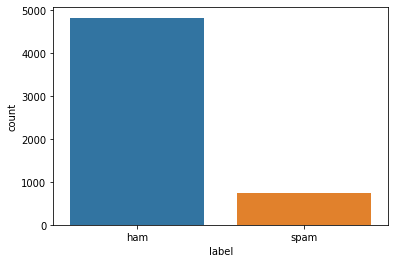

In [102]:
sns.countplot(x= data['label']);

There is class imbalance.

In [103]:
import re
import nltk

In [104]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [105]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [106]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [107]:
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [108]:
corpus = []

In [109]:
# cleaning data 
for i in data['message']:
    review = re.sub('[^a-zA-Z]', ' ', i)
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [110]:
data.shape , len(corpus)

((5572, 2), 5572)

In [111]:
data['message'].sample(2)

5309    Jolly good! By the way,  will give u tickets f...
666     En chikku nange bakra msg kalstiya..then had t...
Name: message, dtype: object

In [112]:
corpus[2069]

'hard believe thing like say lie think twice saying anything'

In [113]:
corpus[2718]

'okie thanx'

In [114]:
X = corpus
y = pd.get_dummies(data['label']).values

In [115]:
y

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [116]:
corpus[0:10]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free']

In [117]:
data['label'].unique()

array(['ham', 'spam'], dtype=object)

In [118]:
y = data['label'].map({'spam':1,'ham':0})

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus, y , test_size=0.2, random_state=0)

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X_train = cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test)

In [121]:
set(X_test.toarray()[0])

{0, 1, 2, 3}

In [122]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [123]:
y_train_pred=classifier.predict(X_train)
y_test_pred=classifier.predict(X_test)

In [124]:
print(classifier.score(X_train,y_train))
print(classifier.score(X_test,y_test))

0.9840700022436617
0.9811659192825112


In [125]:
cv.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aathi',
 'abiola',
 'able',
 'abt',
 'ac',
 'accept',
 'access',
 'account',
 'across',
 'actually',
 'ad',
 'add',
 'added',
 'address',
 'admirer',
 'advance',
 'ae',
 'affair',
 'affection',
 'afraid',
 'aft',
 'afternoon',
 'aftr',
 'age',
 'ago',
 'ah',
 'aha',
 'ahead',
 'ahmad',
 'aight',
 'aint',
 'air',
 'airport',
 'aiya',
 'aiyah',
 'aiyo',
 'al',
 'alert',
 'alex',
 'allah',
 'almost',
 'alone',
 'already',
 'alright',
 'alrite',
 'also',
 'always',
 'amazing',
 'amp',
 'an',
 'angry',
 'announcement',
 'another',
 'answer',
 'answering',
 'anybody',
 'anymore',
 'anyone',
 'anything',
 'anytime',
 'anyway',
 'anyways',
 'apartment',
 'app',
 'apply',
 'april',
 'ar',
 'ard',
 'area',
 'argument',
 'arm',
 'armand',
 'around',
 'arrested',
 'arrive',
 'art',
 'as',
 'asap',
 'ask',
 'askd',
 'asked',
 'askin',
 'asking',
 'ate',
 'attempt',
 'auction',
 'available',
 'ave',
 'await',
 'awaiting',
 'awake',
 'award',
 'awarded',
 'away',
 'awesome',
 'babe',
 'baby',
 'bac

In [126]:
data['message_len']= data['message'].apply(lambda x: len(x.split()))

In [127]:
data['message'][1]

'Ok lar... Joking wif u oni...'

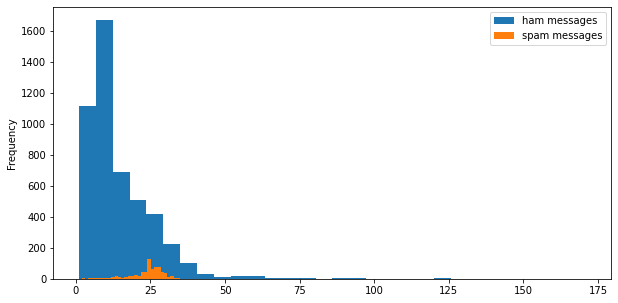

In [128]:
plt.figure(figsize=(10,5))
data[data['label']=='ham']['message_len'].plot(kind = 'hist', label='ham messages',bins=30)
data[data['label']=='spam']['message_len'].plot(kind = 'hist', label='spam messages',bins=30)
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


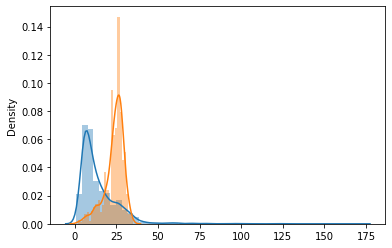

In [129]:
sns.distplot(x=data[data['label']=='ham']['message_len'])
sns.distplot(x=data[data['label']=='spam']['message_len']);

In [130]:
data[data['message_len']==175]

,label,message,message_len


In [131]:
data[data['label']=='ham']['message_len'].describe()

count    4825.000000
mean       14.310259
std        11.517945
min         1.000000
25%         7.000000
50%        11.000000
75%        19.000000
max       171.000000
Name: message_len, dtype: float64

In [132]:
data[data['label']=='spam']['message_len'].describe()

count    747.000000
mean      23.911647
std        5.780174
min        2.000000
25%       22.000000
50%       25.000000
75%       28.000000
max       35.000000
Name: message_len, dtype: float64

In [133]:
data[data['message_len']==171]['message']

1085    For me the love should start with attraction.i...
Name: message, dtype: object

In [134]:
len(data)

5572

In [135]:
data.groupby('label')['message_len'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,4825.0,14.310259,11.517945,1.0,7.0,11.0,19.0,171.0
spam,747.0,23.911647,5.780174,2.0,22.0,25.0,28.0,35.0


In [136]:
data[data['label']=='spam'][data['message_len']== 35]['message']

<ipython-input-136-938746a12450>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data[data['label']=='spam'][data['message_len']== 35]['message']


684     Hi I'm sue. I am 20 years old and work as a la...
4527    I want some cock! My hubby's away, I need a re...
Name: message, dtype: object

In [137]:
data.loc[4527,'message']

"I want some cock! My hubby's away, I need a real man 2 satisfy me. Txt WIFE to 89938 for no strings action. (Txt STOP 2 end, txt rec £1.50ea. OTBox 731 LA1 7WS. )"

In [138]:
data.loc[684,'message']

"Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+"

In [139]:
data[data['label']=='spam']['message'].sample(5)

4450    Urgent UR awarded a complimentary trip to Euro...
5060    Free video camera phones with Half Price line ...
1780    Loan for any purpose £500 - £75,000. Homeowner...
1985    Urgent! Please call 09061743810 from landline....
630     Todays Vodafone numbers ending with 4882 are s...
Name: message, dtype: object

In [140]:
data[data['label']=='ham']['message'].sample(5)

4250       Loosu go to hospital. De dont let it careless.
743     Just got up. have to be out of the room very s...
5352             Good morning princess! Have a great day!
3500    I hope you arnt pissed off but id would really...
5315                          Hahaha..use your brain dear
Name: message, dtype: object

In [141]:
all_words = ' '.join( text for text in corpus)

In [142]:
from wordcloud import WordCloud

In [143]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

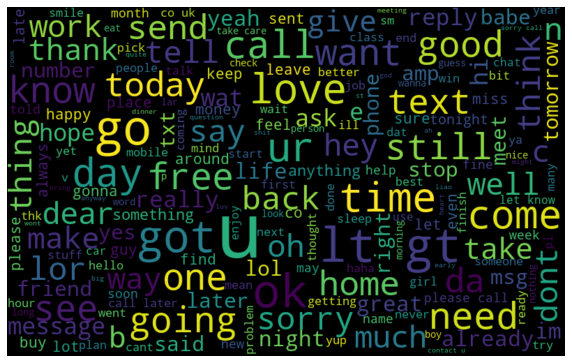

In [144]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [145]:
data['clean_message'] = corpus

In [146]:
spam_words = ' '.join( text for text in data[data['label']=='spam']['clean_message'])

In [147]:
ham_words = ' '.join( text for text in data[data['label']=='ham']['clean_message'])

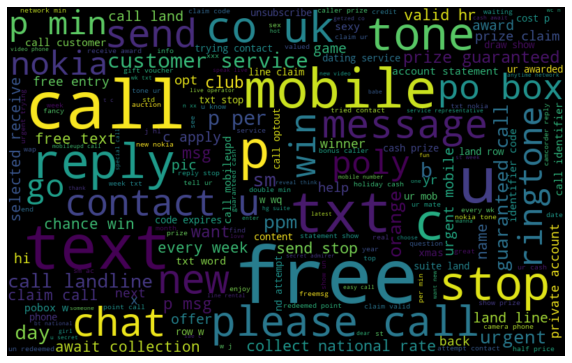

In [148]:
spam_wc = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(spam_words)
plt.figure(figsize=(10, 7))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis('off')
plt.show()

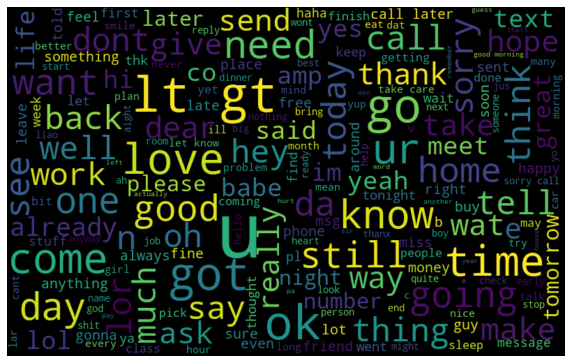

In [149]:
ham_wc = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(ham_words)
plt.figure(figsize=(10, 7))
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis('off')
plt.show()

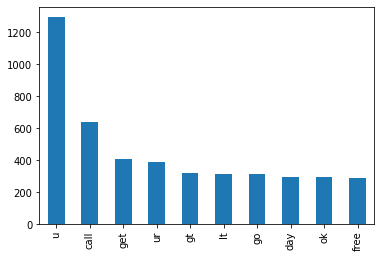

In [150]:
pd.Series(all_words.split()).value_counts()[0:10].plot(kind='bar');

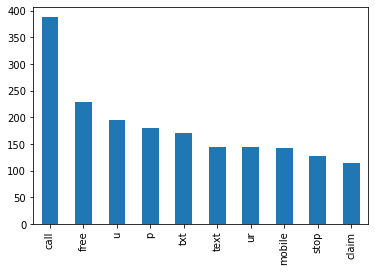

In [151]:
pd.Series(spam_words.split()).value_counts()[0:10].plot(kind='bar');

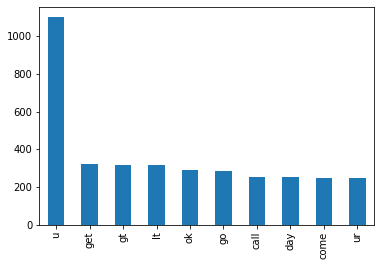

In [152]:
pd.Series(ham_words.split()).value_counts()[0:10].plot(kind='bar');

In [153]:

for n in range(len(data)):
  if 'p' in data['clean_message'][n].split():
    print(n)
    print(data.loc[n,['clean_message','message']])
    

11
clean_message    six chance win cash pound txt csh send cost p ...
message          SIX chances to win CASH! From 100 to 20,000 po...
Name: 11, dtype: object
117
clean_message    winner u specially selected receive holiday fl...
message          You are a winner U have been specially selecte...
Name: 117, dtype: object
135
clean_message    want get laid tonight want real dogging locati...
message          Want 2 get laid tonight? Want real Dogging loc...
Name: 135, dtype: object
147
clean_message    freemsg replied text randy sexy female live lo...
message          FreeMsg Why haven't you replied to my text? I'...
Name: 147, dtype: object
235
clean_message    text meet someone sexy today u find date even ...
message          Text & meet someone sexy today. U can find a d...
Name: 235, dtype: object
268
clean_message    ur ringtone service changed free credit go clu...
message          Ur ringtone service has changed! 25 Free credi...
Name: 268, dtype: object
335
clean_message    val

In [154]:
data.loc[3620,'clean_message']

'p alfie moon child need song ur mob tell ur txt tone charity nokias poly charity polys zed profit charity'

In [155]:
data.loc[3620,'message']

"8007 25p 4 Alfie Moon's Children in Need song on ur mob. Tell ur m8s. Txt TONE CHARITY to 8007 for nokias or POLY CHARITY for polys :zed 08701417012 profit 2 charity "

In [156]:
for n in range(len(data)):
  if 'u' in data['clean_message'][n].split():
    print(n)
    print(data.loc[n,['clean_message','message']])

1
clean_message          ok lar joking wif u oni
message          Ok lar... Joking wif u oni...
Name: 1, dtype: object
3
clean_message                  u dun say early hor u c already say
message          U dun say so early hor... U c already then say...
Name: 3, dtype: object
9
clean_message    mobile month u r entitled update latest colour...
message          Had your mobile 11 months or more? U R entitle...
Name: 9, dtype: object
17
clean_message    eh u remember spell name yes v naughty make v wet
message          Eh u remember how 2 spell his name... Yes i di...
Name: 17, dtype: object
18
clean_message                           fine way u feel way gota b
message          Fine if thats the way u feel. Thats the way ...
Name: 18, dtype: object
23
clean_message    aft finish lunch go str lor ard smth lor u fin...
message          Aft i finish my lunch then i go str down lor. ...
Name: 23, dtype: object
30
clean_message        wait still clear sure sarcastic x want live u
message   

In [157]:
k = 0
for n in range(len(data)):
  if 'gt' in data['clean_message'][n].split():
    print(n)
    print(data.loc[n,['clean_message','message']])
    k = k+1
  if k == 10:
    break

44
clean_message          great hope like man well endowed lt gt inch
message          Great! I hope you like your man well endowed. ...
Name: 44, dtype: object
51
clean_message    gram usually run like lt gt half eighth smarte...
message          A gram usually runs like  &lt;#&gt; , a half e...
Name: 51, dtype: object
55
clean_message       know mallika sherawat yesterday find lt url gt
message          Do you know what Mallika Sherawat did yesterda...
Name: 55, dtype: object
78
clean_message                                 operate lt gt
message          Does not operate after  &lt;#&gt;  or what
Name: 78, dtype: object
178
clean_message    turn friend staying whole show back til lt gt ...
message          Turns out my friends are staying for the whole...
Name: 178, dtype: object
200
clean_message                             found enc lt gt
message          Found it, ENC  &lt;#&gt; , where you at?
Name: 200, dtype: object
201
clean_message                 sent lt gt buck
message     

In [158]:
data.loc[220,'clean_message']

'yeah think use gt atm register sure anyway help let know sure ready'

In [159]:
data.loc[220,'message']

"Yeah you should. I think you can use your gt atm now to register. Not sure but if there's anyway i can help let me know. But when you do be sure you are ready."